In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import manifold

from environments.gridworlds.gridworlds_classic import *
from agents.pgp.pgp_softmax import SoftMaxPGP
from plots.gridworlds.gridworld_visualizer import *
from utils.policy_functions import *
from utils.policy_tools import *

# Analysis of Policy Dynamics

### Two rooms world

In [68]:
# world parameters
n_square = 5

# agent parameters
gamma=0.99
alpha = 0.01
n_steps = 1000

# simulation parameters
n_bots = 8

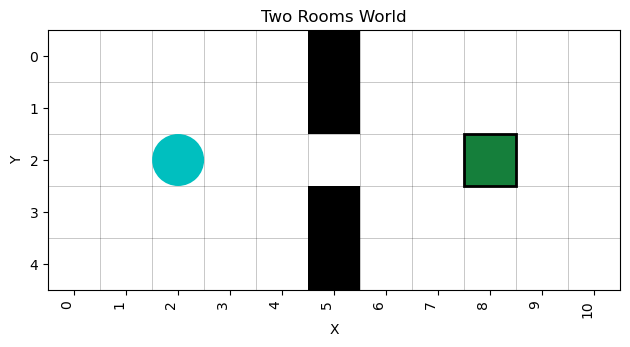

In [69]:
world = TwoRooms(n_square=n_square)
viz = GridWorldVisualizer(world)

viz.plot_maze()
plt.title("Two Rooms World")
plt.tight_layout()
plt.show()

Here we solve the two rooms world multiple times, each time with different starting and goal locations.

100%|██████████| 1000/1000 [00:01<00:00, 699.07it/s]
/tmp/ipykernel_800575/2082143039.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors[i_bot, :, :] = plt.cm.get_cmap("hsv", n_bots+1)(i_bot)


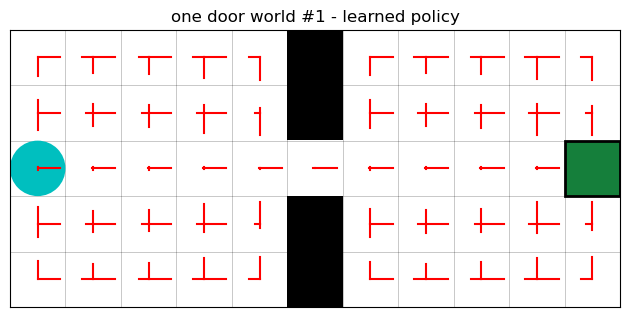

100%|██████████| 1000/1000 [00:01<00:00, 674.87it/s]


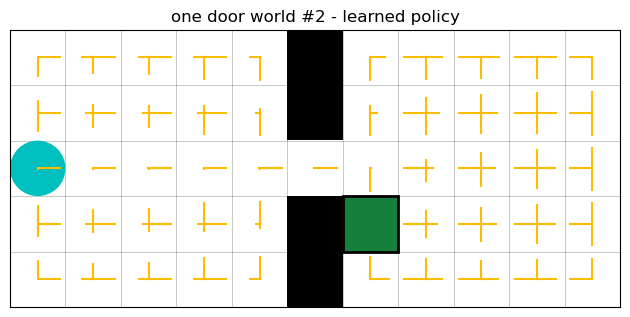

100%|██████████| 1000/1000 [00:01<00:00, 683.17it/s]


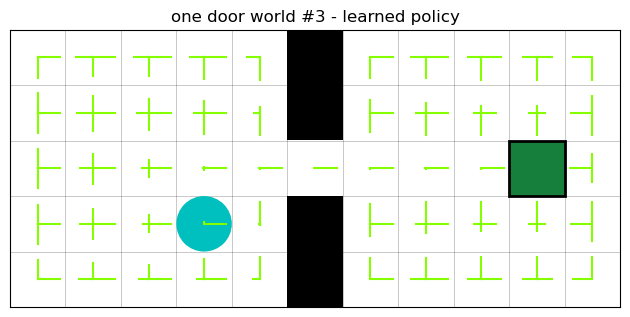

100%|██████████| 1000/1000 [00:01<00:00, 561.69it/s]


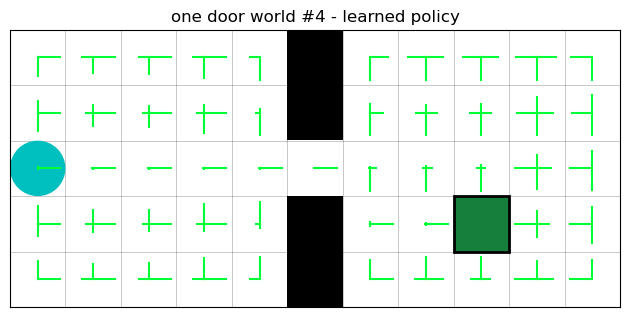

100%|██████████| 1000/1000 [00:01<00:00, 554.06it/s]


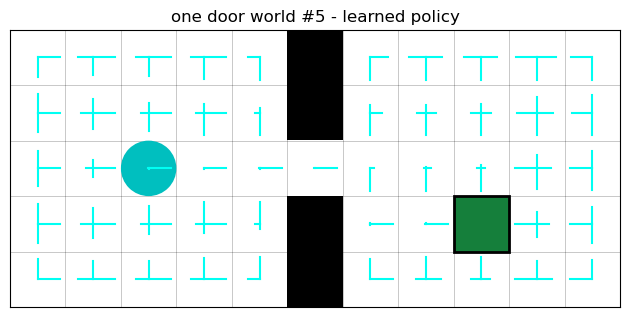

100%|██████████| 1000/1000 [00:01<00:00, 649.45it/s]


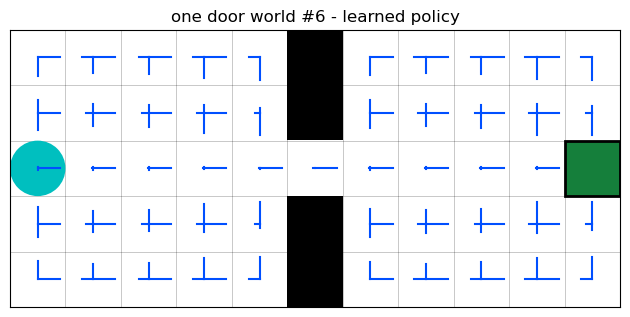

100%|██████████| 1000/1000 [00:01<00:00, 700.29it/s]


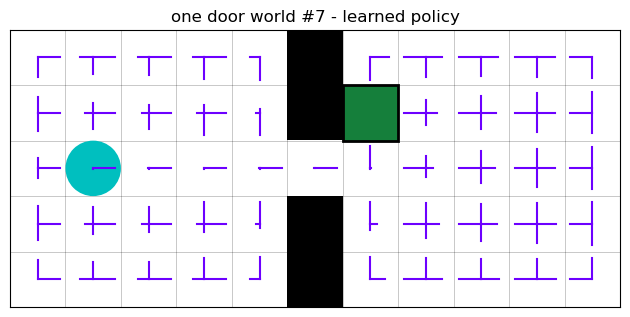

100%|██████████| 1000/1000 [00:01<00:00, 732.05it/s]


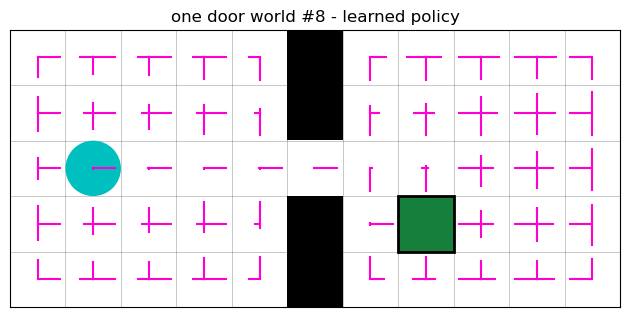

In [70]:
thetas = np.ndarray([n_bots, n_steps, world.n_state, world.n_action], dtype=float)
policies = np.ndarray([n_bots, n_steps, world.n_state, world.n_action], dtype=float)
colors = np.ndarray([n_bots, n_steps, 4], dtype=float)

for i_bot in range(n_bots):
    init_locs_i = np.array([[np.random.randint(0, n_square), np.random.randint(0, n_square)]])
    term_locs_i = np.array([[np.random.randint(n_square+1, 2*n_square+1), np.random.randint(0, n_square)]])
    world_i = TwoRooms(n_square=n_square, init_locs=init_locs_i, term_locs=term_locs_i)

    bot_i = SoftMaxPGP(world_i, gamma=gamma)
    bot_i.learn(n_steps=n_steps, alpha=alpha)

    thetas[i_bot] = bot_i.theta_t
    policies[i_bot] = policy_history(bot_i)
    colors[i_bot, :, :] = plt.cm.get_cmap("hsv", n_bots+1)(i_bot)
    colors[i_bot, :, :3] *= np.flip(np.cumprod(np.full([n_steps, 3], 0.999), axis=0))

    viz_i = GridWorldVisualizer(world_i, bot_i)
    viz_i.plot_policy(plot_axis=False, cs=[colors[i_bot, -1, :], colors[i_bot, -1, :], colors[i_bot, -1, :]])
    plt.tight_layout()
    plt.title("one door world #{} - learned policy".format(i_bot+1))
    plt.show()

theta_points = np.reshape(thetas, [n_bots*n_steps, world.n_state*world.n_action])
policy_points = np.reshape(policies, [n_bots*n_steps, world.n_state*world.n_action])
color_points = np.reshape(colors, [n_bots*n_steps, 4])

In [71]:
# We collect the policies learned in the previous step, and plot them in a 2D embedding
md_scaling = manifold.MDS(n_components=2, max_iter=150, n_init=1)
policies_2d = md_scaling.fit_transform(policy_points)

/home/fran-tr/anaconda3/envs/rl/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


We project the learned policies into a 2D embedding using MDS.

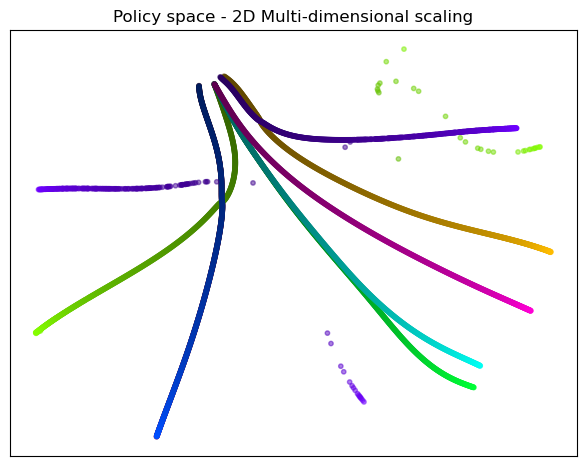

In [72]:

plt.scatter(policies_2d[:, 0], policies_2d[:, 1], c=color_points, s=10, alpha=0.5)
plt.tight_layout()
plt.title("Policy space - 2D Multi-dimensional scaling")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()


### Binary Tree World

We use a "binary tree" world, where rooms are connected according to a binary tree structure.
The goal location can be any of the leaf rooms.

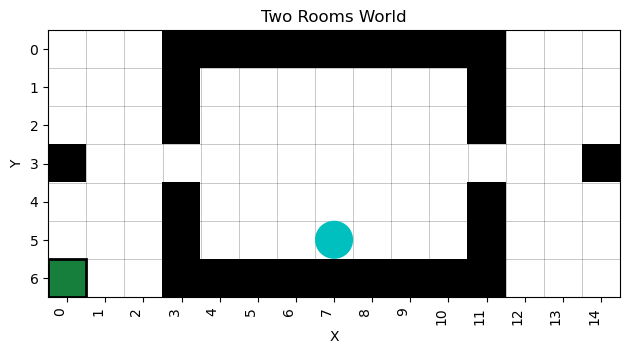

In [77]:
world = TreeMaze()
viz = GridWorldVisualizer(world)

viz.plot_maze()
plt.title("Two Rooms World")
plt.tight_layout()
plt.show()

Here we solve the two rooms world multiple times, each time with different goal locations.

100%|██████████| 1000/1000 [00:01<00:00, 651.43it/s]
/tmp/ipykernel_800575/3092082100.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors[i_bot, :, :] = plt.cm.get_cmap("hsv", n_bots+1)(i_bot)


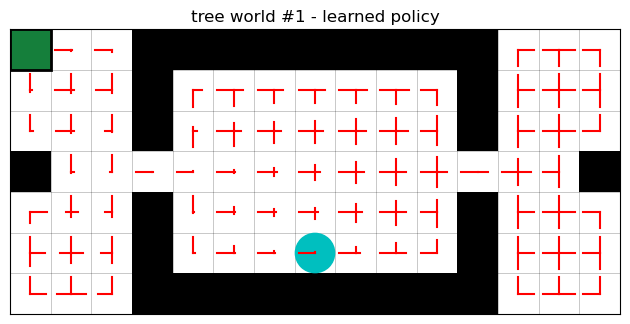

100%|██████████| 1000/1000 [00:01<00:00, 667.72it/s]


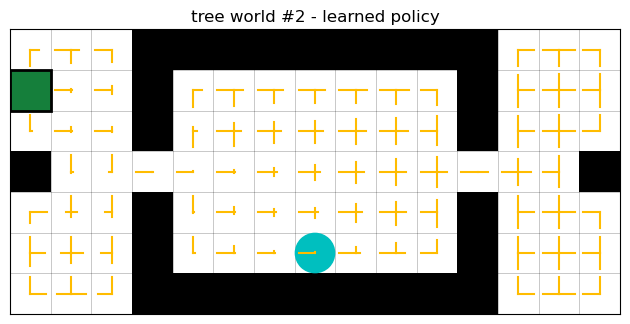

100%|██████████| 1000/1000 [00:01<00:00, 609.35it/s]


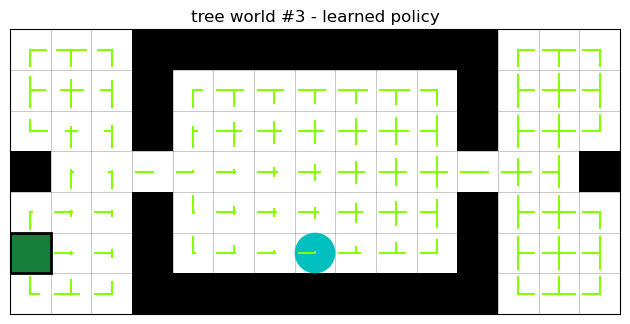

100%|██████████| 1000/1000 [00:01<00:00, 754.75it/s]


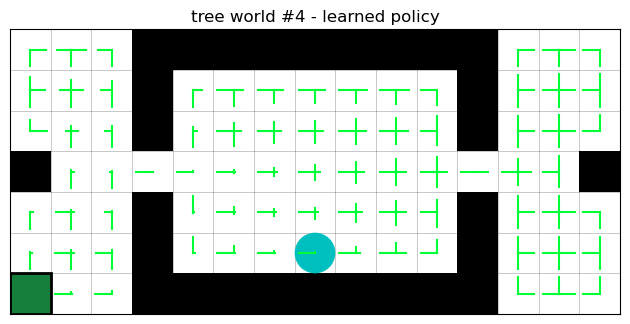

100%|██████████| 1000/1000 [00:01<00:00, 668.91it/s]


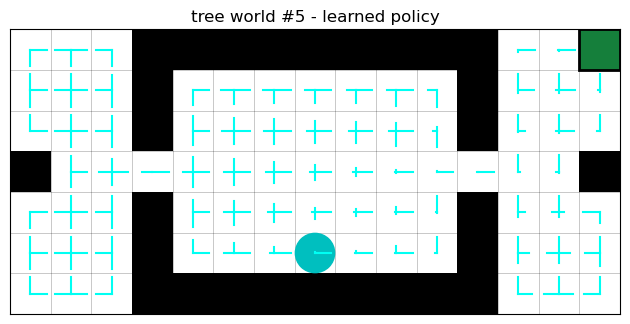

100%|██████████| 1000/1000 [00:01<00:00, 667.63it/s]


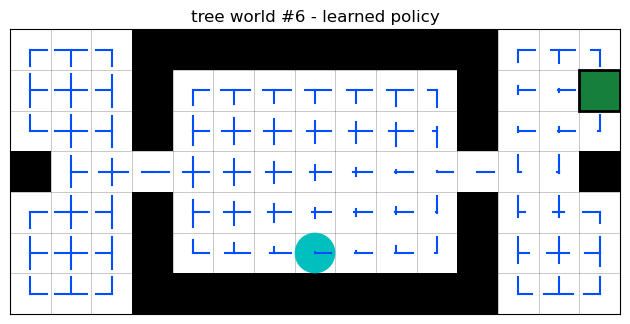

100%|██████████| 1000/1000 [00:01<00:00, 580.28it/s]


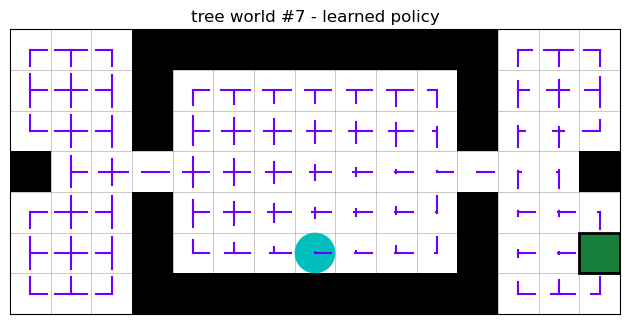

100%|██████████| 1000/1000 [00:01<00:00, 668.93it/s]


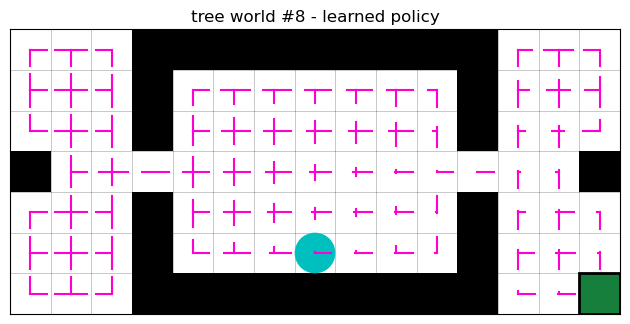

In [80]:
n_bots = len(world.goal_locs)

thetas = np.ndarray([n_bots, n_steps, world.n_state, world.n_action], dtype=float)
policies = np.ndarray([n_bots, n_steps, world.n_state, world.n_action], dtype=float)
colors = np.ndarray([n_bots, n_steps, 4], dtype=float)

for i_bot in range(n_bots):
    world_i = TreeMaze(goal_room=i_bot)

    bot_i = SoftMaxPGP(world_i, gamma=gamma)
    bot_i.learn(n_steps=n_steps, alpha=alpha)

    thetas[i_bot] = bot_i.theta_t
    policies[i_bot] = policy_history(bot_i)
    colors[i_bot, :, :] = plt.cm.get_cmap("hsv", n_bots+1)(i_bot)
    colors[i_bot, :, :3] *= np.flip(np.cumprod(np.full([n_steps, 3], 0.999), axis=0))

    viz_i = GridWorldVisualizer(world_i, bot_i)
    viz_i.plot_policy(plot_axis=False, cs=[colors[i_bot, -1, :], colors[i_bot, -1, :], colors[i_bot, -1, :]])
    plt.tight_layout()
    plt.title("tree world #{} - learned policy".format(i_bot+1))
    plt.show()

theta_points = np.reshape(thetas, [n_bots*n_steps, world.n_state*world.n_action])
policy_points = np.reshape(policies, [n_bots*n_steps, world.n_state*world.n_action])
color_points = np.reshape(colors, [n_bots*n_steps, 4])

In [81]:
md_scaling = manifold.MDS(n_components=2, max_iter=150, n_init=1)
policies_2d = md_scaling.fit_transform(policy_points)

/home/fran-tr/anaconda3/envs/rl/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


We collect the policies learned in the previous step, and plot them in a 2D embedding

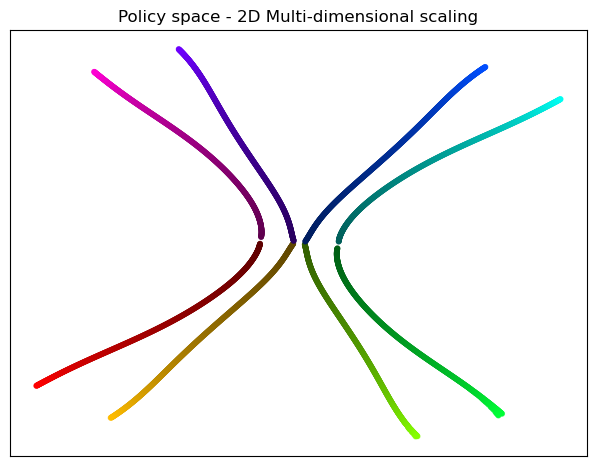

In [82]:
plt.scatter(policies_2d[:, 0], policies_2d[:, 1], c=color_points, s=10, alpha=0.5)
plt.tight_layout()
plt.title("Policy space - 2D Multi-dimensional scaling")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()